# Official French Hospital Covid-19 Data 
#### Cedric Chauve

This notebook imports and visualizes data from the French Public Health authority (Santé publique France).

In [1]:
import pandas as pd
pd.set_option('max_colwidth', 800)
import matplotlib.pyplot as plt

In [2]:
# Codes of french departments, grouped by regions

# Metropolitan France and Corsica
METRO_dep = [str(dep) for dep in range(1,96)]
# Region Grand-Est
GE_dep = ['08','10','51','52','54','55','57','67','68','88']
# Region Ile-de-France
IdF_dep = ['75','77','78','91','92','93','94','95']
# Region Nouvelle-Aquitaine
NAq_dep = ['16','17','19','23','24','33','40','47','64','79','86','87']

## Hospital ER and SOS Medecins data 

We first look at the data from emergency rooms and SOS medecins (emergency mobile GPs).
These data records the daily number of visits to ER services and the daily nterventions of SOS medecins.
They record all interventions and all interventions linked to **suspected** (but not confirmed) Covid-19 cases; we will look only at Covid-19 related interventions.

In [3]:
# Gather data for a region, grouped by date, for age group 0 and all genders
def FRANCE_ER_SOS_DE_GROUP(region):
    DF_aux          = FRANCE_ER_SOS_DEP.loc[FRANCE_ER_SOS_DEP['dep'].isin(region)]
    DF              = DF_aux.loc[DF_aux['sursaud_cl_age_corona'] == '0']
    DF_AGE0_CNV     = DF.loc[DF['sursaud_cl_age_corona'] == '0'][['date_de_passage','nbre_pass_corona','nbre_acte_corona']]
    AGGREG_ER_SOS_DATE  = {'nbre_pass_corona': 'sum', 'nbre_acte_corona': 'sum', 'date_de_passage': 'first'}
    DF_AGE0_CNV_GROUPED = DF_AGE0_CNV.groupby(DF_AGE0_CNV['date_de_passage']).aggregate(AGGREG_ER_SOS_DATE)
    return(DF_AGE0_CNV_GROUPED)

def plot_ER_SOS_CNV(df,region):
    df.plot(kind='bar',x='date_de_passage',stacked='true',figsize=(10,6))
    plt.title('ER+SOS medecins Covid-19 records, '+region)
    plt.ylabel('Number of ER visits/SOS medecins acts')
    plt.show()

In [4]:
# Downloading the raw data, csv format
print('Downloading the data for all French departments\n')
FRANCE_ER_SOS_DEP = pd.read_csv('https://www.data.gouv.fr/en/datasets/r/eceb9fb4-3ebc-4da3-828d-f5939712600a')

In [5]:
# Metadata: Fields description
FRANCE_ER_SOS_DEP_META = pd.read_csv('https://www.data.gouv.fr/en/datasets/r/2265d880-5260-4b34-8827-b3d76180032e',sep=';')
del FRANCE_ER_SOS_DEP_META['Unnamed: 1']
del FRANCE_ER_SOS_DEP_META['Unnamed: 2']
FRANCE_ER_SOS_DEP_META.drop([0],inplace=True)
FRANCE_ER_SOS_DEP_META.rename(inplace=True,columns={'Métadonnées fichier SOS medecin et urgences hopitalières':'Fields','Unnamed: 3':'Description','Unnamed: 4':'Example'})
print('Fields of the downloaded data\n')
print(FRANCE_ER_SOS_DEP_META.to_markdown())

Fields of the downloaded data

|    | Fields                | Description                                                                                     | Example    |
|---:|:----------------------|:------------------------------------------------------------------------------------------------|:-----------|
|  1 | dep                   | Department                                                                                      | 02         |
|  2 | date_de_passage       | Date of notice                                                                                  | 2020-02-24 |
|  3 | sursaud_cl_age_corona | Age group                                                                                       | 0          |
|  4 | nbre_pass_corona      | Number of emergency room visits for suspicion of COVID-19                                       | 0          |
|  5 | nbre_pass_tot         | Total amount of emergency room visits                                                 

In [6]:
# Metadata: Age groups
#FRANCE_AGE_GROUPS = pd.read_csv('https://www.data.gouv.fr/en/datasets/r/cbed61a8-64e8-4c8c-8e97-65d3a31a99b6',sep=';')
#print('Age groups\n')
#print(FRANCE_AGE_GROUPS.to_markdown())

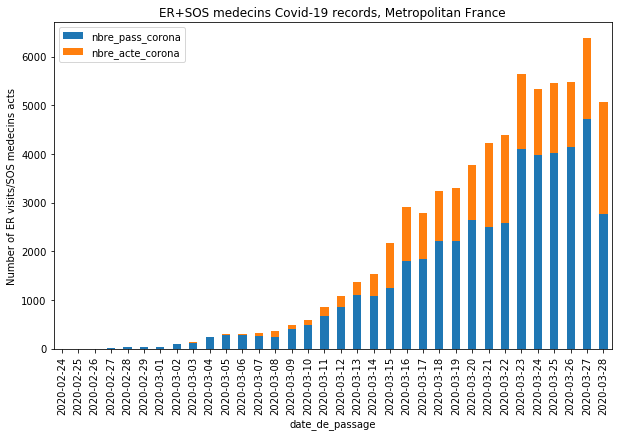

In [7]:
FRANCE_ER_SOS_AGE0_CNV_METRO = FRANCE_ER_SOS_DE_GROUP(METRO_dep)
plot_ER_SOS_CNV(FRANCE_ER_SOS_AGE0_CNV_METRO,'Metropolitan France')

We look at data fro three regions.
Ile-de-France and Grand-est are the most impacted regions. 
Nouvelle-Aquitaine is mildly impacted by Covid-19.

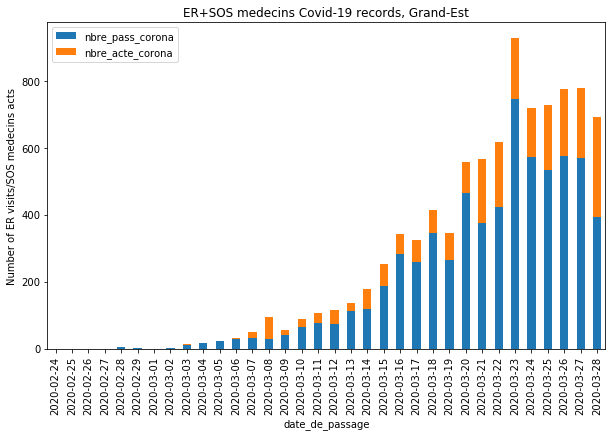

In [8]:
FRANCE_ER_SOS_GE_AGE0_CNV_GROUPED = FRANCE_ER_SOS_DE_GROUP(GE_dep)
plot_ER_SOS_CNV(FRANCE_ER_SOS_GE_AGE0_CNV_GROUPED,'Grand-Est')

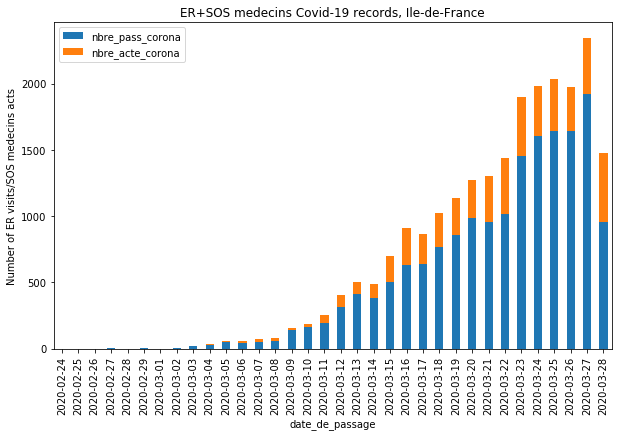

In [9]:
FRANCE_ER_SOS_IF_AGE0_CNV_GROUPED = FRANCE_ER_SOS_DE_GROUP(IdF_dep)
plot_ER_SOS_CNV(FRANCE_ER_SOS_IF_AGE0_CNV_GROUPED,'Ile-de-France')

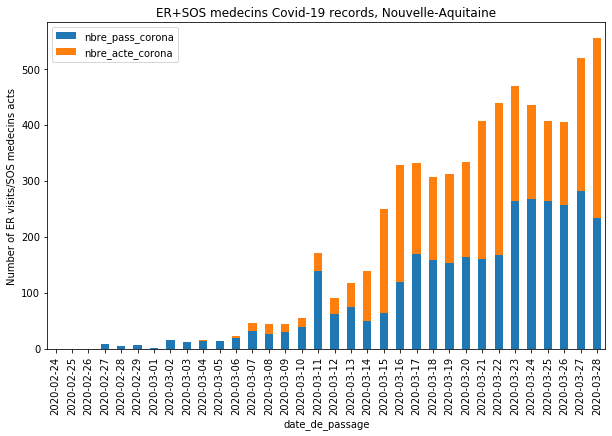

In [10]:
FRANCE_ER_SOS_NA_AGE0_CNV_GROUPED = FRANCE_ER_SOS_DE_GROUP(NAq_dep)
plot_ER_SOS_CNV(FRANCE_ER_SOS_NA_AGE0_CNV_GROUPED,'Nouvelle-Aquitaine')

## Hospitalization data 

These data records the daily number of hospitalized patients due to Covid-19, including the ones in critical care. These data do not include cases in senior homes, that seem to account for many cases.

In [11]:
# Gather data for a region, grouped by date
def FRANCE_HOSP_CNV_DE_GROUP(region):
    DF_aux          = FRANCE_HOSP_CNV.loc[FRANCE_HOSP_CNV['dep'].isin(region)][['jour','sexe','hosp','rea','rad','dc']]
    DF              = DF_aux.loc[DF_aux['sexe'] == 0][['jour','hosp','rea','rad','dc']]
    AGGREG_HOSP_DATE  = {'hosp': 'sum', 'rea': 'sum', 'jour': 'first', 'rad':'sum', 'dc': 'sum'}
    DF_GROUPED = DF.groupby(DF['jour']).aggregate(AGGREG_HOSP_DATE)
    return(DF_GROUPED)

def plot_HOSP_CNV(df,region):
    df.plot(kind='bar',x='jour',figsize=(10,6), width=0.75)
    plt.title('Hospitalizations Covid-19 records, '+region)
    plt.ylabel('Number of hospitalized / removed patients')
    plt.show()

In [12]:
# Downloading the raw data, csv format
print('Downloading the data for all France\n')
FRANCE_HOSP_CNV = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7',sep=';')

In [13]:
# Metadata: Fields description
FRANCE_HOSP_CNV_META = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/3f0f1885-25f4-4102-bbab-edec5a58e34a',sep=';')
del FRANCE_HOSP_CNV_META['Type ']
del FRANCE_HOSP_CNV_META['Description_FR']
FRANCE_HOSP_CNV_META.rename(inplace=True,columns={'Colonne':'Fields','Description_EN':'Description','Exemple':'Example'})
print('Fields of the downloaded data\n')
print(FRANCE_HOSP_CNV_META.to_markdown())

Fields of the downloaded data

|    | Fields   | Description                                                  | Example    |
|---:|:---------|:-------------------------------------------------------------|:-----------|
|  0 | dep      | Department                                                   | 1          |
|  1 | sexe     | Sex                                                          | 0          |
|  2 | jour     | Date of notice                                               | 18/03/2020 |
|  3 | hosp     | Number of people currently hospitalized                      | 2          |
|  4 | rea      | Number of people currently in resuscitation or critical care | 0          |
|  5 | rad      | Total amount of patient that returned home                   | 1          |
|  6 | dc       | Total amout of deaths at the hospital                        | 0          |


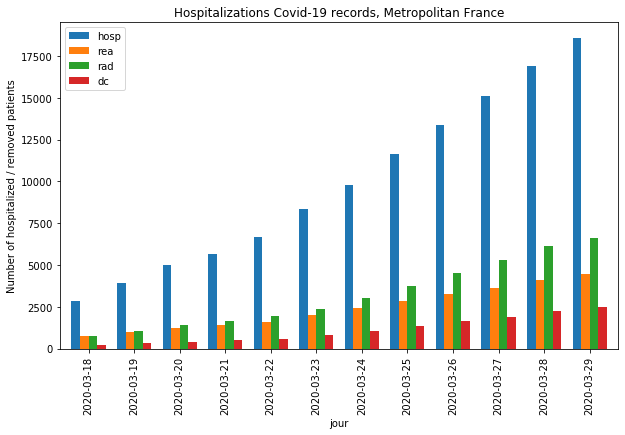

In [14]:
FRANCE_HOSP_CNV_METRO = FRANCE_HOSP_CNV_DE_GROUP(METRO_dep)
plot_HOSP_CNV(FRANCE_HOSP_CNV_METRO,'Metropolitan France')

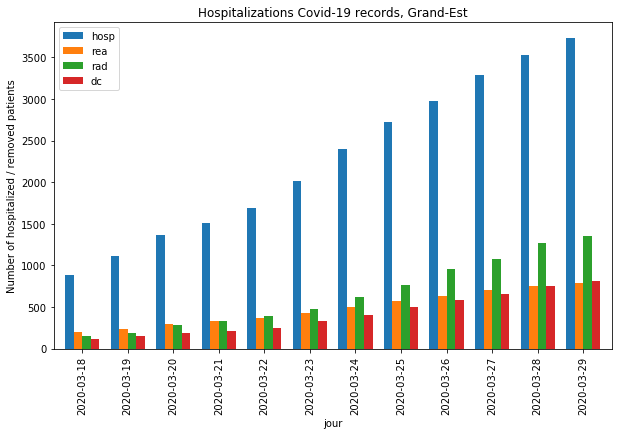

In [15]:
FRANCE_HOSP_CNV_GE = FRANCE_HOSP_CNV_DE_GROUP(GE_dep)
plot_HOSP_CNV(FRANCE_HOSP_CNV_GE,'Grand-Est')

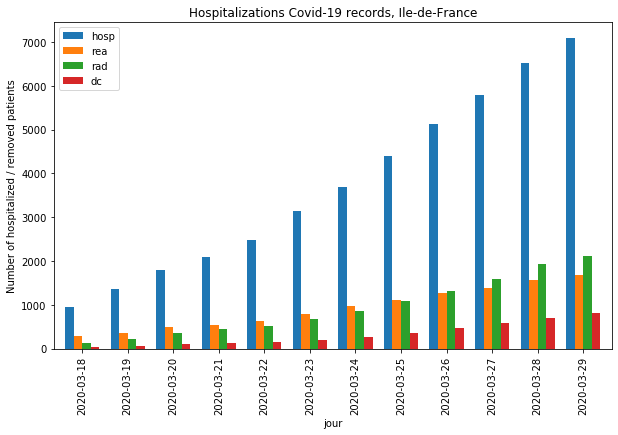

In [16]:
FRANCE_HOSP_CNV_IF = FRANCE_HOSP_CNV_DE_GROUP(IdF_dep)
plot_HOSP_CNV(FRANCE_HOSP_CNV_IF,'Ile-de-France')

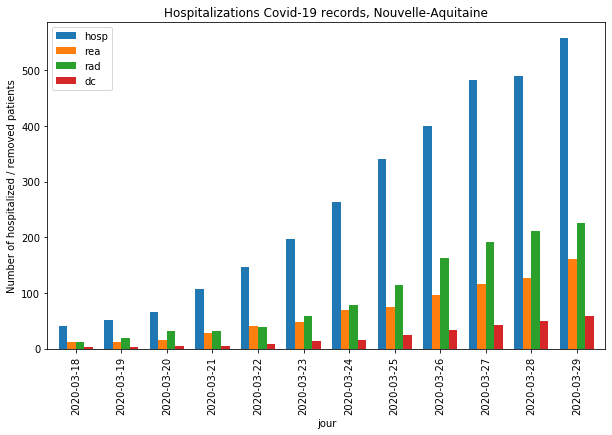

In [17]:
FRANCE_HOSP_CNV_NA = FRANCE_HOSP_CNV_DE_GROUP(NAq_dep)
plot_HOSP_CNV(FRANCE_HOSP_CNV_NA,'Nouvelle-Aquitaine')